In [ ]:
Mod = include("../src/EventFiltering.jl")
using Mod.EventFiltering

Below, we create two spike trains, `e1` and `e2` with spikes of different magnitude.
We combine both spike trains into a single spike train `e3`.

We convolve the spike train `e3` multiple times with an exponential filter `F`, and subtract the result of filtering the filtered process `X` again with an exponential filter `F`.

We plot the results.

In [6]:
e1 = EventTrain([1.0, 2.0, 3.0])
e2 = 2*EventTrain([0.5, 1.5, 2.5, 3.5])
e3 = 1.5 * e1 + e2

F1 = ExponentialFilter(1.0)
X = F1∘F1∘e3
θ1 = F1∘X
M1 = X - θ1

F2 = ExponentialFilter(0.5)
θ2 = F2∘X
M2 = X - θ2

print("X:\t$(typeof(X))\nθ1:\t$(typeof(θ1))\nM1:\t$(typeof(M1))\nθ2:\t$(typeof(θ2))\nM2:\t$(typeof(M2))")

X:	EventFiltering.FilteredEventTrain{Float64,Float64,EventFiltering.GammaFilter{Float64,Float64}}
θ1:	EventFiltering.FilteredEventTrain{Float64,Float64,EventFiltering.GammaFilter{Float64,Float64}}
M1:	EventFiltering.##12#13{EventFiltering.FilteredEventTrain{Float64,Float64,EventFiltering.GammaFilter{Float64,Float64}},EventFiltering.FilteredEventTrain{Float64,Float64,EventFiltering.GammaFilter{Float64,Float64}}}
θ2:	EventFiltering.FilteredEventTrain{Float64,Float64,EventFiltering.LaplaceFilter{Float64}}
M2:	EventFiltering.##12#13{EventFiltering.FilteredEventTrain{Float64,Float64,EventFiltering.GammaFilter{Float64,Float64}},EventFiltering.FilteredEventTrain{Float64,Float64,EventFiltering.LaplaceFilter{Float64}}}

We plot the results.


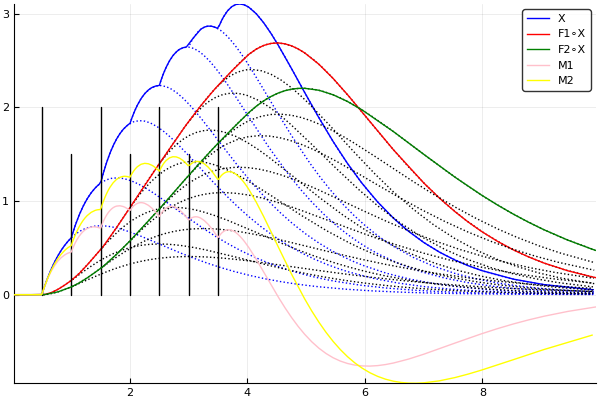

In [7]:
using Plots
pyplot()

plot(X, 0,10, color=:blue, event_color=:blue, show_kernels=true, label="X")
plot!(θ1, 0, 10, color=:red, show_events=false, show_kernels=true, label="F1∘X")
plot!(θ2, 0, 10, color=:green, show_events=true, show_kernels=true, label="F2∘X")
plot!(M1, 0, 10, color=:pink, label="M1")
plot!(M2, 0, 10, color=:yellow, label="M2")